# Cross-correlation

We often encounter the need to match the pattern in two signals. For example, we may record a whale call at two different hydrophones and we may want to identify the difference in times when they occurred. Or may want to match the pattern in an emitted signal to the return pattern reflected off an object to identify the time delay and the distance to the object. A widespread method is to find the offset at which the signals are most correlated, i.e. the patterns match.

Let's consider the two identical chirps which differ by their phase.



In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

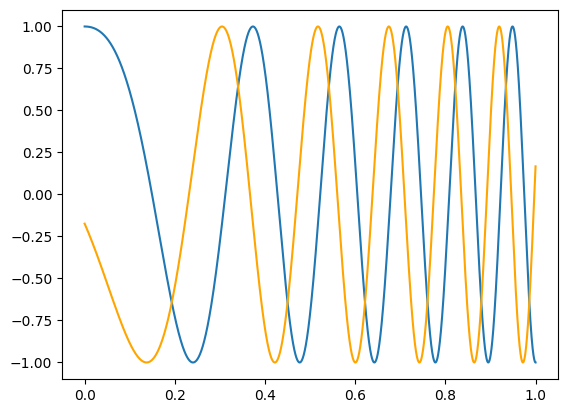

In [2]:
N = 10000
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False)

chirp1 = sp.signal.chirp(time, f0=1, t1=1, f1=10, phi=0)
chirp2 = sp.signal.chirp(time, f0=1, t1=1, f1=10, phi=100)

plt.plot(time, chirp1)
plt.plot(time, chirp2, "orange")

## Pattern Alignment

We want to shift in time one of the signals until it matches the other one.

In [3]:
from ipywidgets import interact
import ipywidgets as widgets

In [4]:
def plot_shifted_chirp(time_shift):
    idx = round(time_shift*N)-1
    time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
    chirp1 = sp.signal.chirp(time, f0=0, t1=1, f1=10) # zero phase, upchirp
    chirp2 = sp.signal.chirp(time, f0=1, t1=1, f1=10, phi=100)
    if idx>0:
        chirp2_shifted = np.pad(chirp2[idx:], (idx,0))
    else:
        chirp2_shifted = np.pad(chirp2[:-idx], (0,idx))   

    plt.plot(time, chirp1)
    plt.plot(time, chirp2_shifted)

In [5]:
out = interact(plot_shifted_chirp, time_shift=0.1)

interactive(children=(FloatSlider(value=0.1, description='time_shift', max=0.30000000000000004, min=-0.1), Out…